In [12]:
# ~/opt/anaconda3/bin/python

import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import re

# Data Loading and Initial Inspection

In [13]:
import pandas as pd

df = pd.read_csv('Data_cleaned_and_tokenized.csv')
display(df.head())
len(df)

index                                               qid1  \
0      0  Food Truck Festival,UPBeat Spring Concert,Spri...   
1      2  Food Truck Festival,T-shirt or swag giveaways,...   
2      3  T-shirt or swag giveaways,Thwing Tuesday,Club ...   
3      4  UPBeat Spring Concert,Spring Comedian at Sever...   
4      5  T-shirt or swag giveaways,Off-campus trips (e....   

                                                qid2 qid2_13_text  \
0                                                NaN           []   
1  Food Festivals ,Major shows or performances (c...           []   
2  Food Festivals ,Arts & Crafts  ,Workshops/skil...           []   
3  Food Festivals ,Swag/giveaway events ,Pop-up c...           []   
4  Food Festivals ,Swag/giveaway events ,Concerts...           []   

                      qid8_text                     qid9_text  \
0                            []                            []   
1           ['wish', 'concert']                      ['sure']   
2                            []                            []   
3                   ['upballs']                   ['upballs']   
4  ['petting', 'zoo', 'crumbl']  ['petting', 'zoo', 'crumbl']   

                                                qid5 qid5_9_text  \
0  Free food/snacks,Swag (shirts, water bottles, ...          []   
1  Free food/snacks,Socializing/meeting new peopl...          []   
2  Free food/snacks,Swag (shirts, water bottles, ...          []   
3  Free food/snacks,Swag (shirts, water bottles, ...          []   
4  Free food/snacks,Swag (shirts, water bottles, ...          []   

                                               qid50 qid50_11_text  ...  \
0                                                NaN            []  ...   
1         Mexican/Latin (tacos, burritos, empanadas)            []  ...   
2  American comfort (burgers, BBQ, wings),Mexican...            []  ...   
3  Mexican/Latin (tacos, burritos, empanadas),Asi...            []  ...   
4  American comfort (burgers, BBQ, wings),Mexican...            []  ...   

  qid49_text                                         qid38_text  \
0         []  ['crossbody', 'bag', 'keychains', 'bucket', 'h...   
1         []  ['like', 'shirt', 'sweatshirt', 'wish', 'wasnt...   
2         []                             ['anything', 'useful']   
3         []                                ['ninja', 'creamy']   
4         []                                   ['golf', 'club']   

   qid43_nps_group  qid43                                         qid44_text  \
0         Promoter    9.0  ['shorter', 'line', 'one', 'line', 'lessen', '...   
1        Detractor    5.0                 ['make', 'thing', 'le', 'walkins']   
2        Detractor    6.0                                                 []   
3        Detractor    5.0                                ['ninja', 'creamy']   
4          Passive    7.0                                             ['na']   

               qid58           qid59_text q_unansweredpercentage  \
0                NaN                   []               0.000000   
1       Ninja Creami                   []               0.000000   
2          Air Fryer                   []               0.256410   
3       Ninja Creami  ['ninja', 'creamy']               0.000000   
4  Hatch Alarm Clock               ['na']               0.026316   

                               q_unansweredquestions duration_secs  
0                                                NaN         545.0  
1                                                NaN         222.0  
2  QID9,QID8,QID52,QID42,QID54,QID27,QID59,QID22,...         190.0  
3                                                NaN         238.0  
4                                              QID52         327.0  

[5 rows x 58 columns]

626

## Data Dictionary

In [14]:
data_dict_df = pd.read_csv('Data_dictionary.csv')
display(data_dict_df)

original_column                  short_name  \
0                            4                        qid1   
1                            5                        qid2   
2                    5_13_TEXT                qid2_13_text   
3                            6                   qid8_text   
4                            7                   qid9_text   
5                            8                        qid5   
6                     8_9_TEXT                 qid5_9_text   
7                            9                       qid50   
8                    9_11_TEXT               qid50_11_text   
9                           10                  qid53_text   
10                        11_1                     qid10_1   
11                        11_2                     qid10_2   
12                        11_3                     qid10_3   
13                        11_4                     qid10_4   
14                        11_5                     qid10_5   
15                          12                       qid13   
16                          13                  qid15_text   
17                          14                        qid3   
18                          15                        qid4   
19                          16                        qid6   
20                          17                        qid7   
21                   17_9_TEXT                 qid7_9_text   
22                          18                       qid16   
23                          19                       qid17   
24                          20                       qid18   
25                          21                  qid19_text   
26                          22                       qid20   
27                          23                       qid21   
28                   23_6_TEXT                qid21_6_text   
29                          24                  qid22_text   
30                          25                       qid39   
31                          26                  qid40_text   
32                          27                  qid41_text   
33                          28                  qid42_text   
34                          29                  qid54_text   
35                          30                  qid55_text   
36                          31                       qid56   
37                   31_9_TEXT                qid56_9_text   
38                          32                       qid23   
39                          33                  qid24_text   
40                          34                       qid26   
41                          35                  qid25_text   
42                          36                  qid27_text   
43                          37                       qid52   
44                   37_3_TEXT                qid52_3_text   
45                        38_1                     qid28_1   
46                        38_2                     qid28_2   
47                          39                  qid49_text   
48                          40                  qid38_text   
49                41_NPS_GROUP             qid43_nps_group   
50                          41                       qid43   
51                          42                  qid44_text   
52                          43                       qid58   
53                          44                  qid59_text   
54       Q_StraightliningCount       q_straightliningcount   
55  Q_StraightliningPercentage  q_straightliningpercentage   
56   Q_StraightliningQuestions   q_straightliningquestions   
57      Q_UnansweredPercentage      q_unansweredpercentage   
58       Q_UnansweredQuestions       q_unansweredquestions   

                                       question_label  \
0   Which UPB events from last year did you attend...   
1   Which types of events would you most like to s...   
2   Which types of events would you most like to s...   
3   What’s one specific event (from last year or a...   
4        

In [15]:
# Processing for multiselect questions, turning them into lists
string_list_columns = ['qid1', 'qid2', 'qid3', 'qid4', 'qid7', 'qid5', 'qid16', 'qid17', 'qid50', 'qid56']
split_pattern = r',\s*(?![^()]*\))'

for col in string_list_columns:
    # Check if the column exists and has a non-numeric dtype
    if col in df.columns and not np.issubdtype(df[col].dtype, np.number):
        # Apply a custom function to split the string by the pattern and strip whitespace and brackets
        df[col] = df[col].apply(
            lambda x: [item.strip().strip("[]'") for item in re.split(split_pattern, str(x))] if pd.notna(x) else []
        )

print(df['qid1'][20])
print(df['qid56'][20])

['Food Truck Festival', 'T-shirt or swag giveaways', 'UPBakery or other pop-up cafes (e.g., Matcha Pop-up)', 'Off-campus trips (e.g., Topgolf, NBA/Cavs game, Columbus trip)', 'UPBeat Spring Concert', 'Spring Comedian at Severance Hall', 'Drone Show', 'Thwing Tuesday']
['Outdoor/nature spots (Edgewater Beach, Cleveland Metroparks, Cuyahoga Valley National Park)']


In [16]:
## Remove ''
text_list_columns = [
    'qid15_text', 'qid19_text', 'qid2_13_text', 'qid21_6_text', 'qid22_text',
    'qid24_text', 'qid25_text', 'qid27_text', 'qid38_text', 'qid40_text',
    'qid41_text', 'qid42_text', 'qid44_text', 'qid49_text', 'qid5_9_text',
    'qid50_11_text', 'qid52_3_text', 'qid53_text', 'qid54_text', 'qid55_text',
    'qid56_9_text', 'qid59_text', 'qid7_9_text', 'qid8_text', 'qid9_text'
]

def normalize_to_list(x):
    """Convert mixed string/list/empty into a clean Python list of strings."""
    # Case 1: already a list
    if isinstance(x, list):
        return [str(i).strip() for i in x]

    # Case 2: scalar NaN/None
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return []

    # Case 3: string
    if isinstance(x, str):
        x = x.strip()
        if x in ["", "[]"]:
            return []
        try:
            val = ast.literal_eval(x)
            if isinstance(val, list):
                return [str(i).strip() for i in val]
            return [str(val).strip()]
        except Exception:
            # fallback: split by commas
            return [item.strip(" []'\"") for item in x.split(",") if item.strip()]

    # Case 4: any other type
    return [str(x).strip()]

# Apply to each _text column
for col in text_list_columns:
    if col in df.columns:
        df[col] = df[col].apply(normalize_to_list)

# Test
print(df['qid9_text'].head(10))


0                        []
1                    [sure]
2                        []
3                 [upballs]
4    [petting, zoo, crumbl]
5              [cavs, game]
6            [im, freshman]
7    [glow, dark, painting]
8           [free, hoodies]
9                        []
Name: qid9_text, dtype: object


# Analysis

## UPB Event Satisfaction

Text(0, 0.5, '')

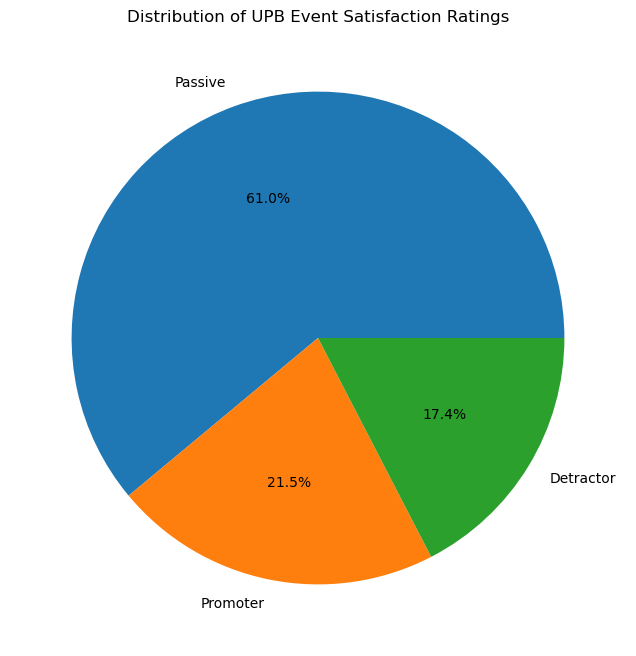

In [17]:
satisfaction_counts = df['qid43_nps_group'].value_counts()
plt.figure(figsize=(8, 8))
satisfaction_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of UPB Event Satisfaction Ratings')
plt.ylabel('')
# plt.gcf()

## Most Attended UPB Events

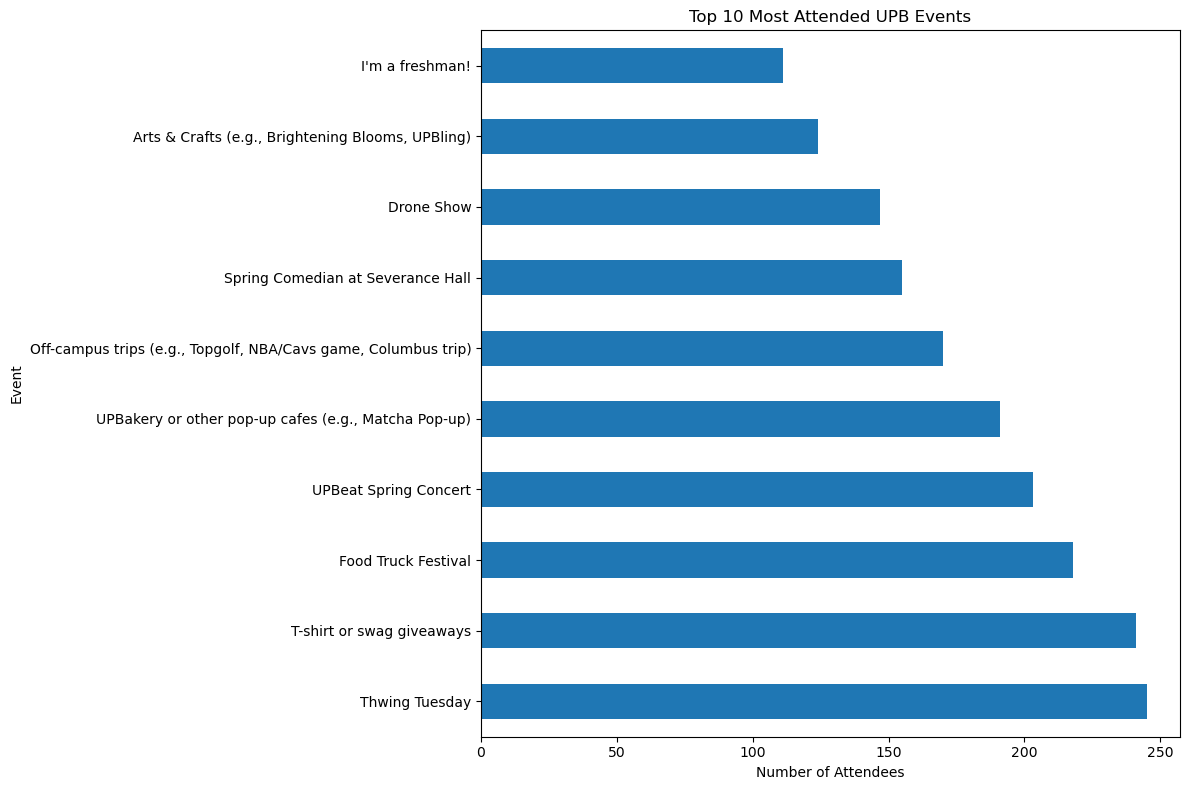

In [18]:
attended_events = df['qid1'].explode().dropna()
attended_events_counts = attended_events.value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
attended_events_counts.head(10).plot(kind='barh')
plt.title('Top 10 Most Attended UPB Events')
plt.xlabel('Number of Attendees')
plt.ylabel('Event')
plt.tight_layout()


## Preferred Future Event Types

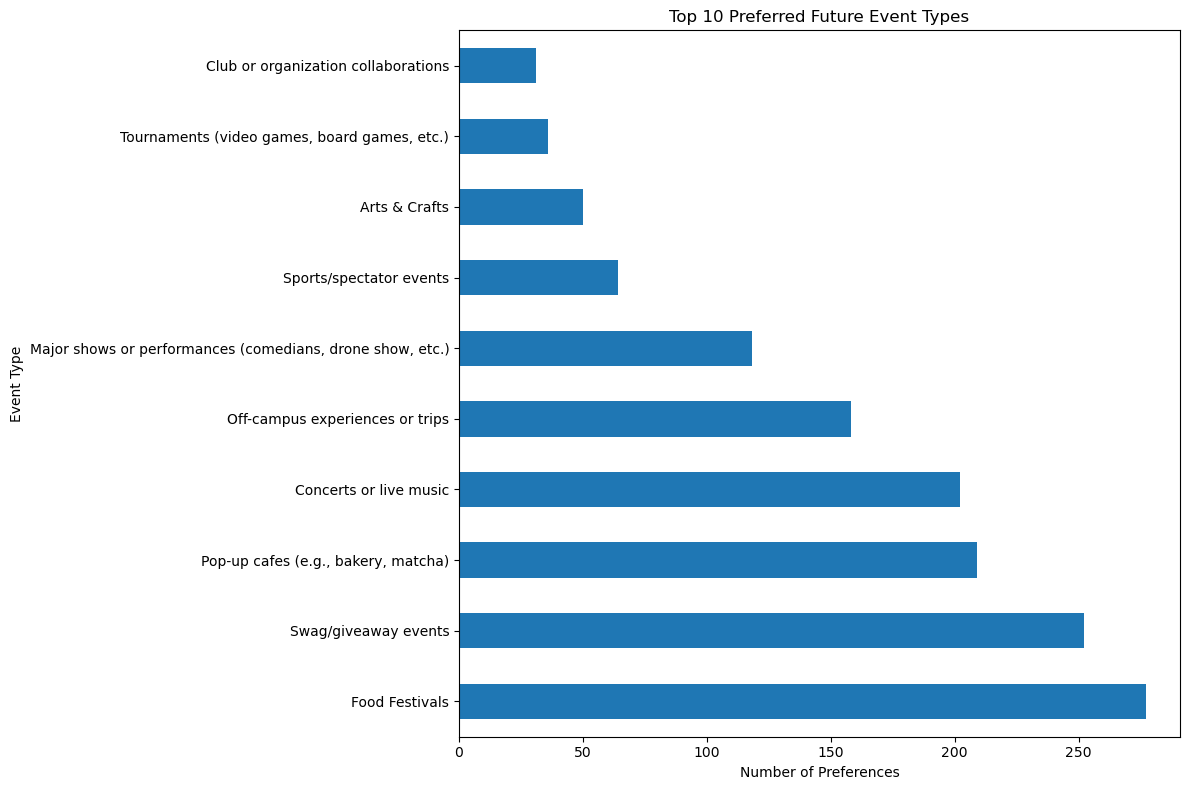

In [19]:
preferred_events = df['qid2'].explode().dropna()
preferred_events_counts = preferred_events.value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
preferred_events_counts.head(10).plot(kind='barh')
plt.title('Top 10 Preferred Future Event Types')
plt.xlabel('Number of Preferences')
plt.ylabel('Event Type')
plt.tight_layout()


## General plot functions

In [20]:
import ast

# ========== Helpers ==========
def _normalize_to_list(x):
    """Turn strings/lists/NaNs into a clean Python list of strings."""
    if isinstance(x, list):
        return [str(i).strip() for i in x]
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return []
    if isinstance(x, str):
        s = x.strip()
        if s in ("", "[]"):
            return []
        try:
            val = ast.literal_eval(s)
            if isinstance(val, list):
                return [str(i).strip() for i in val]
            return [str(val).strip()]
        except Exception:
            # fallback comma split
            return [item.strip(" []'\"") for item in s.split(",") if item.strip()]
    return [str(x).strip()]

def _explode_list_column(df, col):
    """Return a Series with one item per row by exploding a list-like column."""
    col_series = df[col].apply(_normalize_to_list)
    return col_series.explode().dropna()

def _barh_percent(counts_df, label_col, pct_col, title, xlabel="Percentage (%)"):
    plt.figure(figsize=(10, 6))
    bars = plt.barh(counts_df[label_col], counts_df[pct_col])
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel)
    plt.title(title)
    for bar, pct in zip(bars, counts_df[pct_col]):
        plt.text(bar.get_width() + 0.5,
                 bar.get_y() + bar.get_height()/2,
                 f"{pct:.1f}%",
                 va='center')
    plt.tight_layout()
    plt.show()

def _value_counts_percent(series, top=None):
    vc = series.value_counts(dropna=True)
    if top:
        vc = vc.head(top)
    total = vc.sum()
    pct = 100 * vc / total if total else vc*0
    return pd.DataFrame({ "label": vc.index.astype(str), "count": vc.values, "percent": pct.values })


# ========== 1) Multi-select categorical → % bar chart ==========
def plot_multiselect_percent(df, col, title=None, top=None):
    s = _explode_list_column(df, col).astype(str)
    counts = _value_counts_percent(s, top=top).sort_values("percent", ascending=True)
    _barh_percent(counts, "label", "percent", title or f"{col} (multi-select)")


# ========== 2) Single-choice categorical → count/% bar chart ==========
def plot_single_choice(df, col, title=None, percent=True):
    s = df[col].dropna().astype(str)
    counts = _value_counts_percent(s)
    counts = counts.sort_values("percent" if percent else "count", ascending=True)
    if percent:
        _barh_percent(counts, "label", "percent", title or f"{col} (single-choice)")
    else:
        plt.figure(figsize=(10,6))
        bars = plt.barh(counts["label"], counts["count"])
        plt.gca().invert_yaxis()
        plt.xlabel("Count")
        plt.title(title or f"{col} (single-choice)")
        for bar, c in zip(bars, counts["count"]):
            plt.text(bar.get_width() + 0.5,
                     bar.get_y() + bar.get_height()/2,
                     f"{c}",
                     va='center')
        plt.tight_layout()
        plt.show()


# ========== 3) Numeric distributions → histogram + boxplots ==========
def plot_numeric_hist_with_errorbars(series, title="Numeric Distribution", bin_width=1.0):
    # Clean numeric (strip text like "US", "size 9", etc.)
    cleaned = series.astype(str).str.extract(r'(\d+\.?\d*)')[0]
    x = pd.to_numeric(cleaned, errors='coerce').dropna()
    if x.empty:
        print("⚠️ No valid numeric values after cleaning.")
        return
    # Bins aligned to bin_width
    mn, mx = x.min(), x.max()
    bins = np.arange(np.floor(mn/bin_width)*bin_width,
                     np.ceil(mx/bin_width)*bin_width + bin_width,
                     bin_width)
    counts, edges = np.histogram(x, bins=bins)
    centers = (edges[:-1] + edges[1:]) / 2
    errs = np.sqrt(np.maximum(counts, 1))  # Poisson approx; avoid zero error bar

    plt.figure(figsize=(10,6))
    plt.bar(centers, counts, width=np.diff(edges), align='center', alpha=0.7, label="Counts")
    plt.errorbar(centers, counts, yerr=errs, fmt='o', color='black', capsize=5, label="Std Error (√n)")
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_numeric_boxplots(df, cols, title="Willingness to Pay (Boxplots)"):
    # cols: list of numeric columns
    cleaned = {c: pd.to_numeric(df[c], errors='coerce') for c in cols}
    data = [pd.Series(v).dropna() for v in cleaned.values()]
    labels = list(cleaned.keys())

    plt.figure(figsize=(12,6))
    plt.boxplot(data, labels=labels, showmeans=True)
    plt.ylabel("Amount ($)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_numeric_means_medians(df, cols, title="Willingness to Pay (Means vs Medians)"):
    stats = []
    for c in cols:
        x = pd.to_numeric(df[c], errors='coerce').dropna()
        if len(x) == 0:
            stats.append((c, np.nan, np.nan))
        else:
            stats.append((c, x.mean(), x.median()))
    stat_df = pd.DataFrame(stats, columns=["Category", "Mean", "Median"]).set_index("Category")

    idx = np.arange(len(stat_df))
    width = 0.35

    plt.figure(figsize=(12,6))
    plt.bar(idx - width/2, stat_df["Mean"], width, label="Mean")
    plt.bar(idx + width/2, stat_df["Median"], width, label="Median")
    plt.xticks(idx, stat_df.index, rotation=15, ha='right')
    plt.ylabel("$")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ========== 5) Yes/No or Agree-scale → pie or bar ==========
def plot_yes_no(df, col, title=None):
    s = df[col].dropna().astype(str)
    vc = s.value_counts()
    if vc.empty:
        print("⚠️ No data to plot.")
        return
    plt.figure(figsize=(6,6))
    plt.pie(vc.values, labels=vc.index, autopct='%1.1f%%', startangle=90)
    plt.title(title or f"{col}")
    plt.tight_layout()
    plt.show()

## Food Preferences

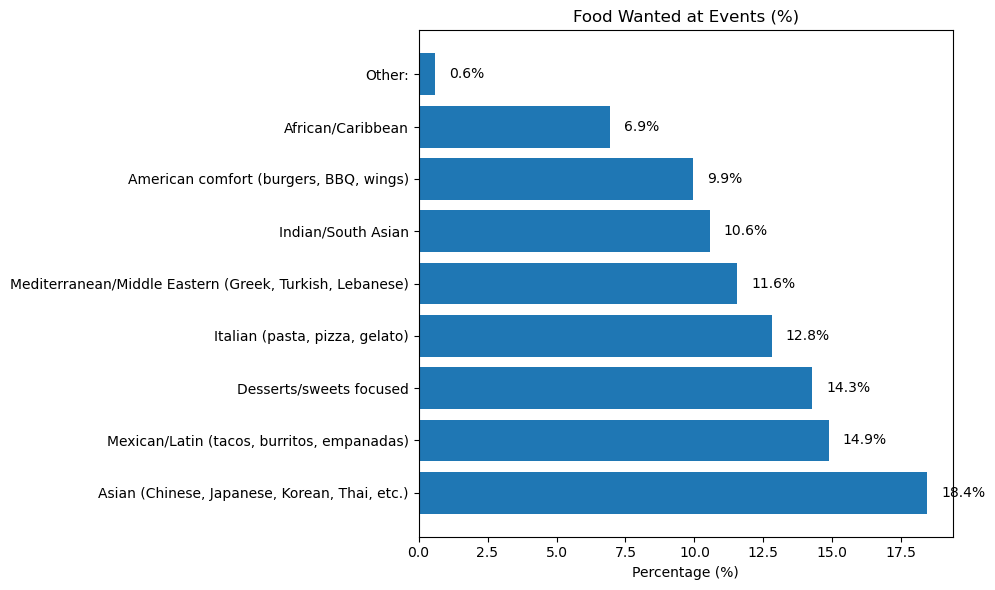

In [21]:
plot_multiselect_percent(df, "qid50", title="Food Wanted at Events (%)", top=15)

## Willingness to pay

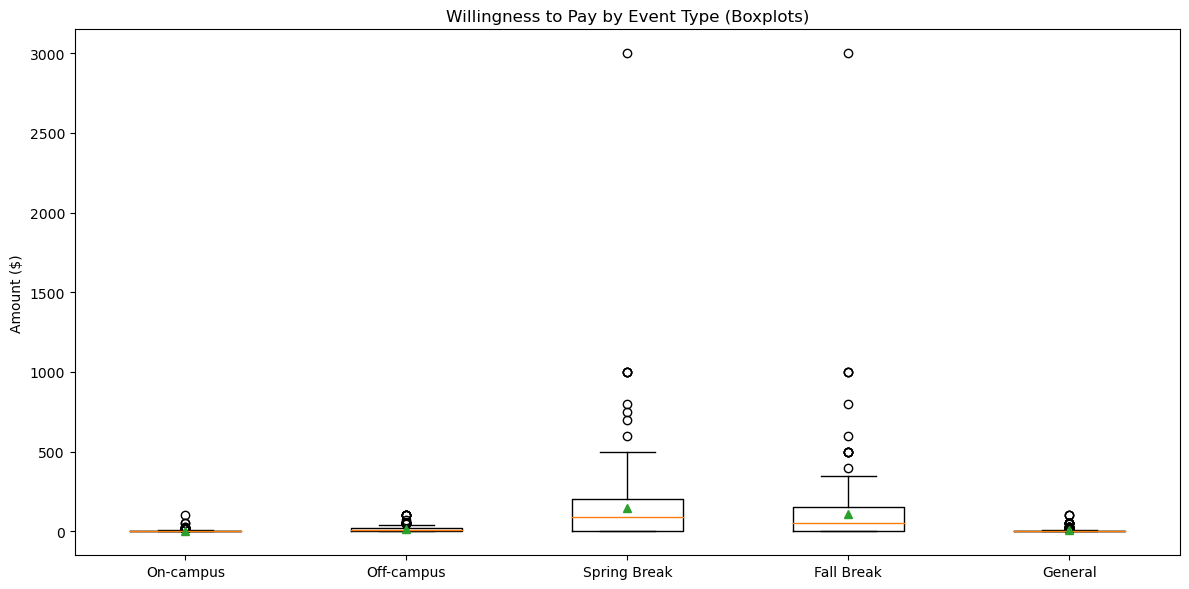

In [22]:
pay_cols = ["qid10_1", "qid10_2", "qid10_3", "qid10_4", "qid10_5"]
labels = ["On-campus", "Off-campus", "Spring Break", "Fall Break", "General"]

data = [pd.to_numeric(df[c], errors='coerce').dropna() for c in pay_cols]

plt.figure(figsize=(12,6))
plt.boxplot(data, labels=labels, showmeans=True)
plt.ylabel("Amount ($)")
plt.title("Willingness to Pay by Event Type (Boxplots)")
plt.tight_layout()
plt.show()


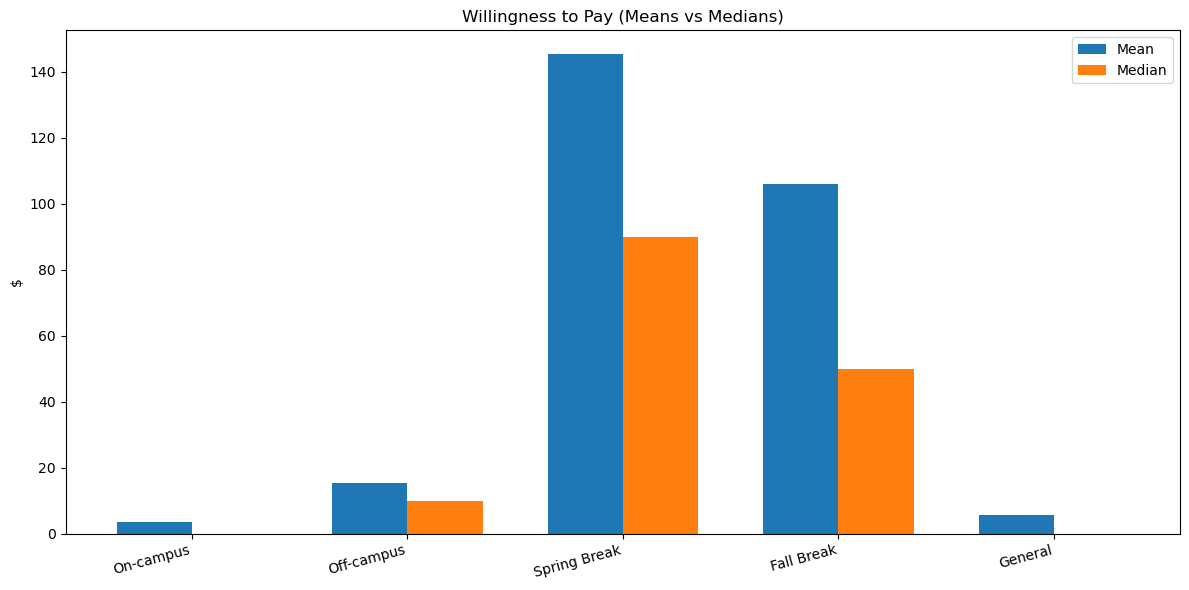

In [23]:
label_map = {
    "qid10_1": "On-campus",
    "qid10_2": "Off-campus",
    "qid10_3": "Spring Break",
    "qid10_4": "Fall Break",
    "qid10_5": "General"
}

pay_cols = list(label_map.keys())

stats = []
for c in pay_cols:
    x = pd.to_numeric(df[c], errors='coerce').dropna()
    stats.append((label_map[c], x.mean() if len(x)>0 else np.nan, x.median() if len(x)>0 else np.nan))

stat_df = pd.DataFrame(stats, columns=["Category", "Mean", "Median"]).set_index("Category")

idx = np.arange(len(stat_df))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(idx - width/2, stat_df["Mean"], width, label="Mean")
plt.bar(idx + width/2, stat_df["Median"], width, label="Median")
plt.xticks(idx, stat_df.index, rotation=15, ha='right')
plt.ylabel("$")
plt.title("Willingness to Pay (Means vs Medians)")
plt.legend()
plt.tight_layout()
plt.show()


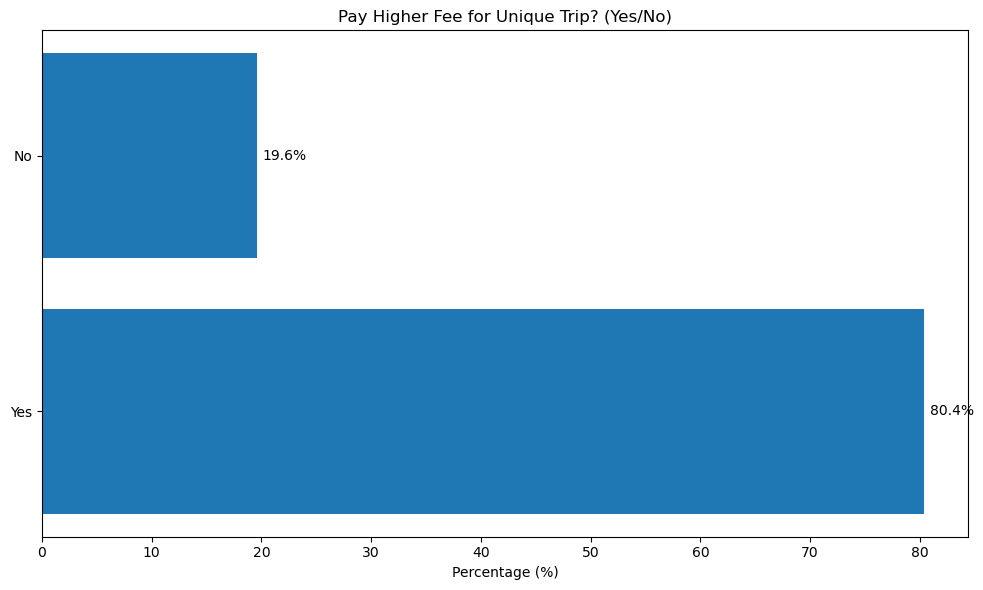

In [24]:
# Higher fee willingness (Yes/No)
plot_single_choice(df, "qid13", title="Pay Higher Fee for Unique Trip? (Yes/No)", percent=True)


## Event Size Preference

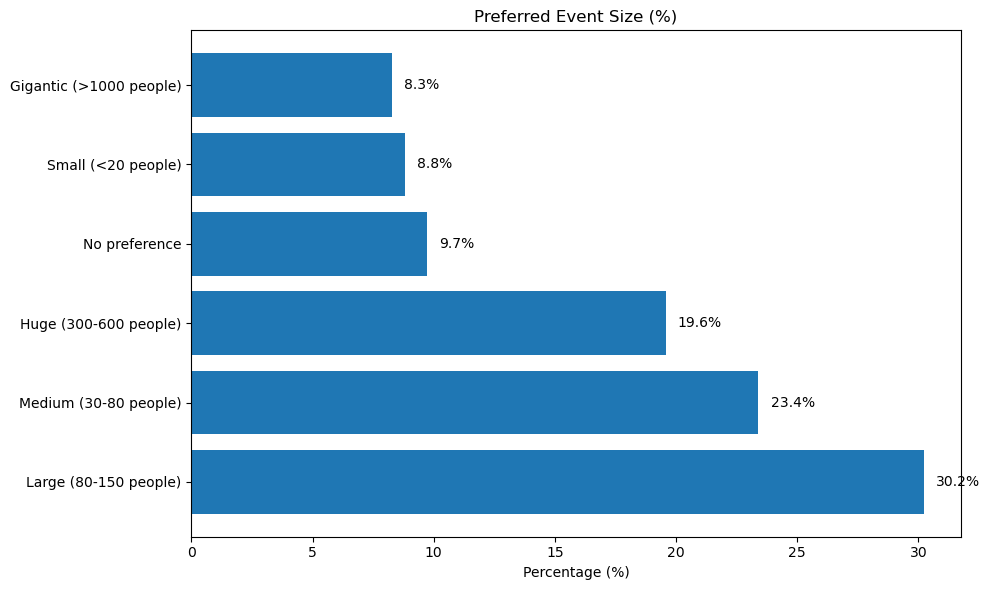

In [25]:
plot_multiselect_percent(df, "qid4", title="Preferred Event Size (%)")


## Availability

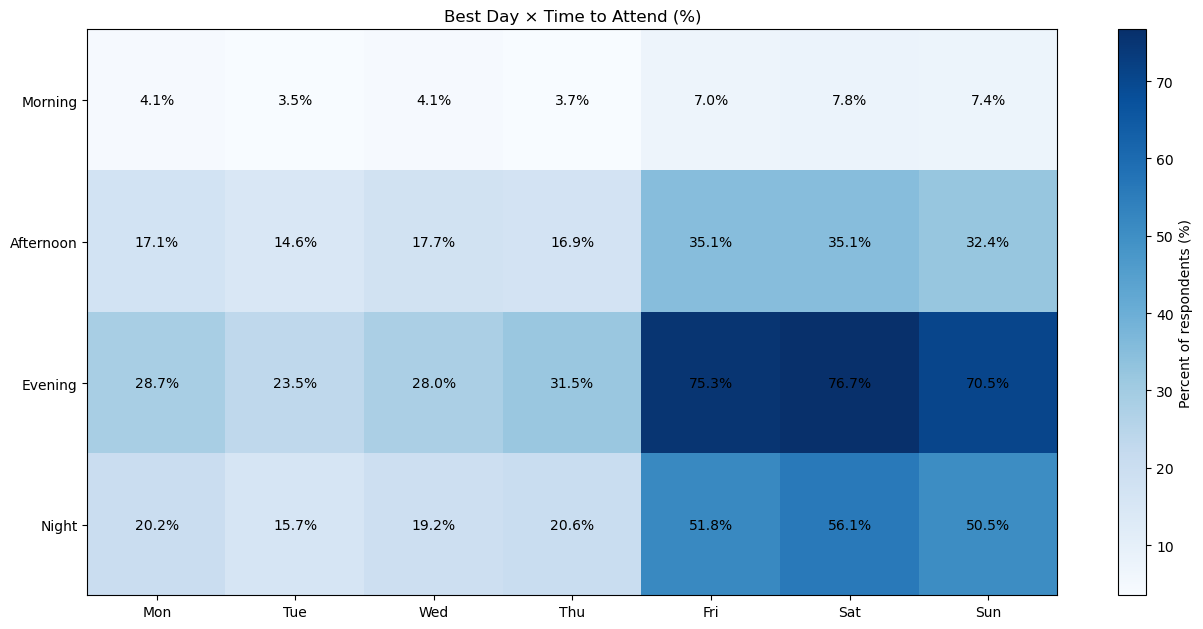

In [26]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Helpers -------------------------------------------------------------
_day_map = {
    "monday":"Mon","tuesday":"Tue","wednesday":"Wed","thursday":"Thu",
    "friday":"Fri","saturday":"Sat","sunday":"Sun",
}
_time_map = {
    "morning":"Morning","afternoon":"Afternoon",
    "evening":"Evening","night":"Night"
}

split_pattern = re.compile(r"\s*,\s*")

def to_list(s):
    """Split a comma-separated string into a clean list."""
    if s is None:
        return []
    if isinstance(s, float) and pd.isna(s):
        return []
    if isinstance(s, (list, tuple)):
        return list(s)
    parts = split_pattern.split(str(s))
    return [p.strip() for p in parts if p.strip()]

def norm_days(s):
    return [_day_map.get(d.lower(), d) for d in to_list(s) if d.strip()]

def norm_times(s):
    times = []
    for raw in to_list(s):
        key = raw.lower()
        for k, v in _time_map.items():
            if k in key:
                times.append(v)
                break
    return times

# --- Heatmap builder ------------------------------------------------------
def plot_availability_heatmap_from_strings(
    df, day_col="qid16", time_col="qid17",
    day_order=("Mon","Tue","Wed","Thu","Fri","Sat","Sun"),
    time_order=("Morning","Afternoon","Evening","Night"),
    title="Best Day × Time to Attend (%)"
):
    day_lists  = df[day_col].apply(norm_days)
    time_lists = df[time_col].apply(norm_times)

    records = []
    n_resp = 0
    for dlist, tlist in zip(day_lists, time_lists):
        if not dlist or not tlist:
            continue
        n_resp += 1
        for d in dlist:
            for t in tlist:
                records.append((d, t))

    if n_resp == 0:
        print("No valid responses to plot.")
        return

    mat = pd.DataFrame(records, columns=["Day","Time"])
    mat["Day"]  = pd.Categorical(mat["Day"],  categories=day_order,  ordered=True)
    mat["Time"] = pd.Categorical(mat["Time"], categories=time_order, ordered=True)

    counts = mat.value_counts(["Time","Day"]).unstack(fill_value=0).reindex(index=time_order, columns=day_order)
    pct = (counts / n_resp) * 100

    plt.figure(figsize=(1.6*len(day_order)+2, 1.1*len(time_order)+2))
    im = plt.imshow(pct.values, aspect="auto", cmap="Blues")
    plt.colorbar(im, label="Percent of respondents (%)")
    plt.xticks(np.arange(len(day_order)), day_order)
    plt.yticks(np.arange(len(time_order)), time_order)
    plt.title(title)

    for r in range(pct.shape[0]):
        for c in range(pct.shape[1]):
            plt.text(c, r, f"{pct.values[r, c]:.1f}%", ha='center', va='center')
    plt.tight_layout()
    plt.show()

plot_availability_heatmap_from_strings(
    df,
    day_col="qid16",
    time_col="qid17",
    day_order=("Mon","Tue","Wed","Thu","Fri","Sat","Sun"),
    time_order=("Morning","Afternoon","Evening","Night"),
    title="Best Day × Time to Attend (%)"
)



## Exam Availability

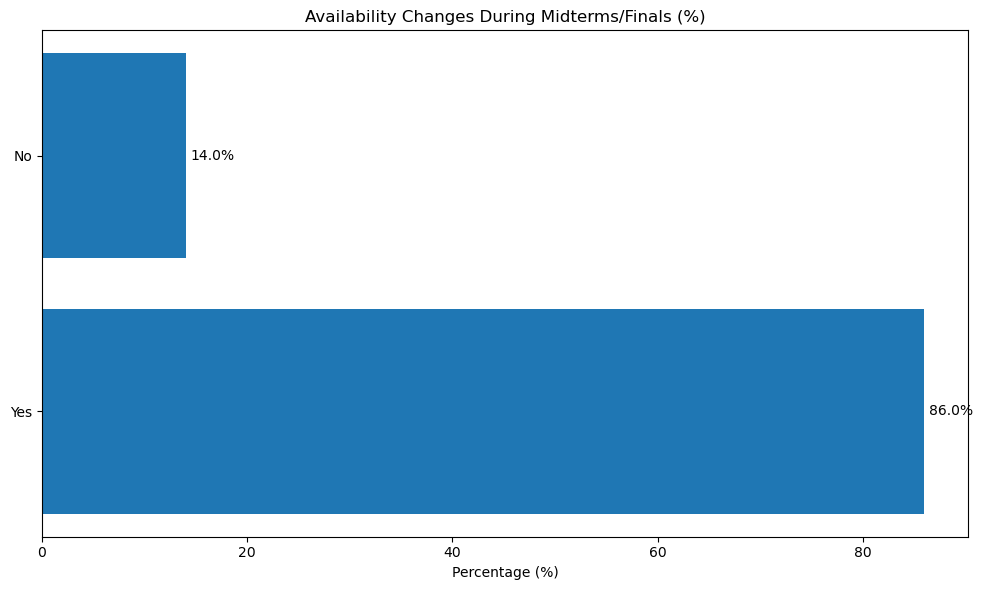

In [27]:
plot_single_choice(df, "qid18", title="Availability Changes During Midterms/Finals (%)", percent=True)


## Event Announcement Schedule

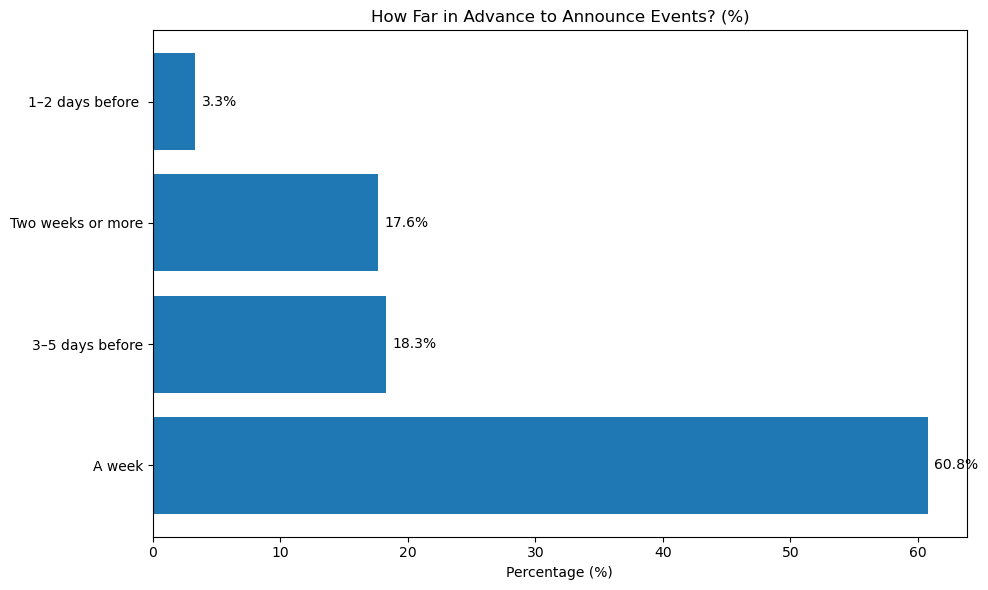

In [28]:
plot_single_choice(df, "qid20", title="How Far in Advance to Announce Events? (%)", percent=True)


# Text Data Analysis

## Suggestions for Improving Events

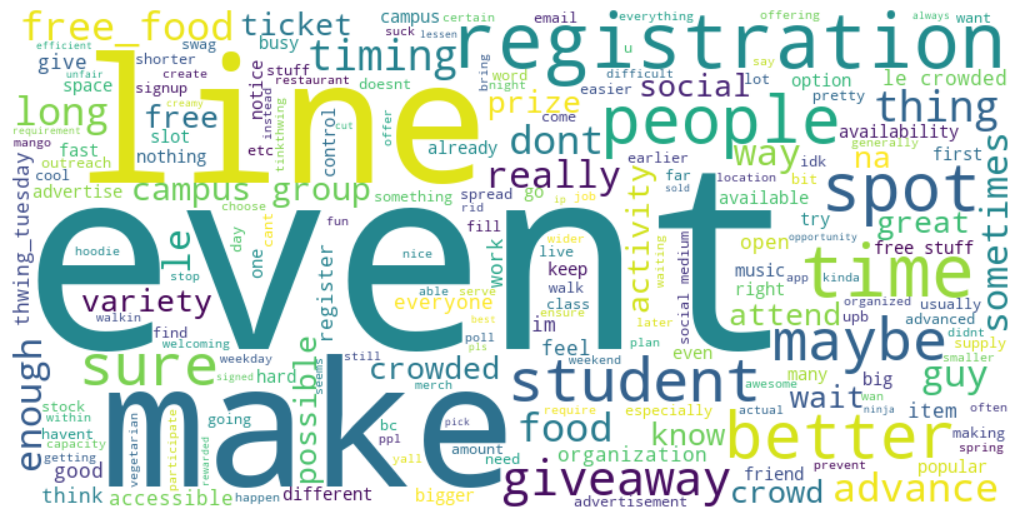

In [29]:
from wordcloud import WordCloud

suggestions = text = ' '.join(df['qid44_text'].explode().dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Enjoyed past events

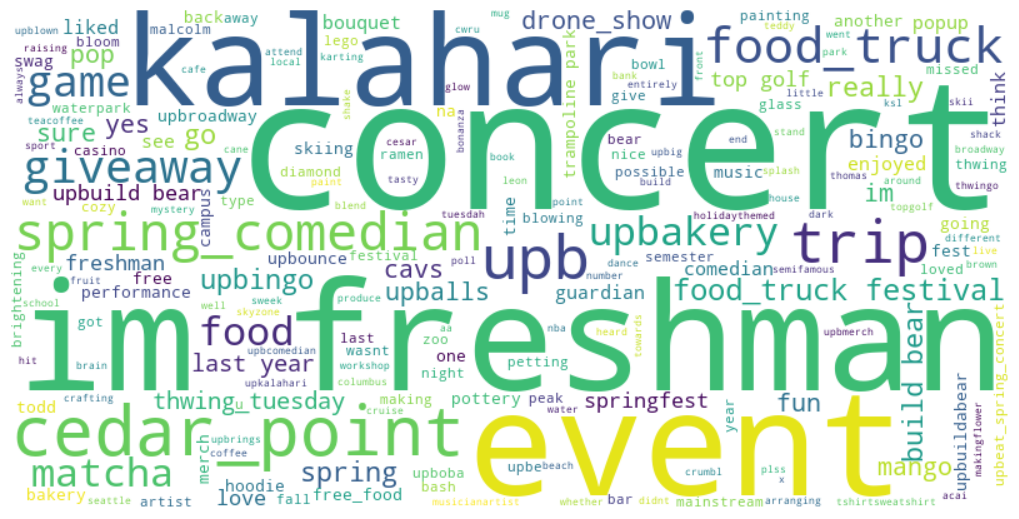

In [30]:
suggestions = text = ' '.join(df['qid9_text'].explode().dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Event Ideas/Should do again

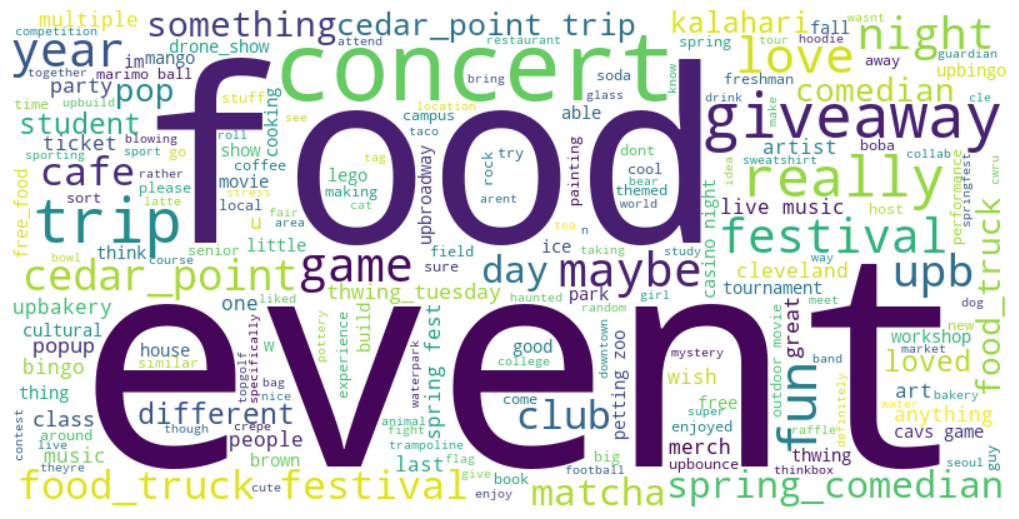

In [31]:
suggestions = text = ' '.join(df['qid8_text'].explode().dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Most Important Features

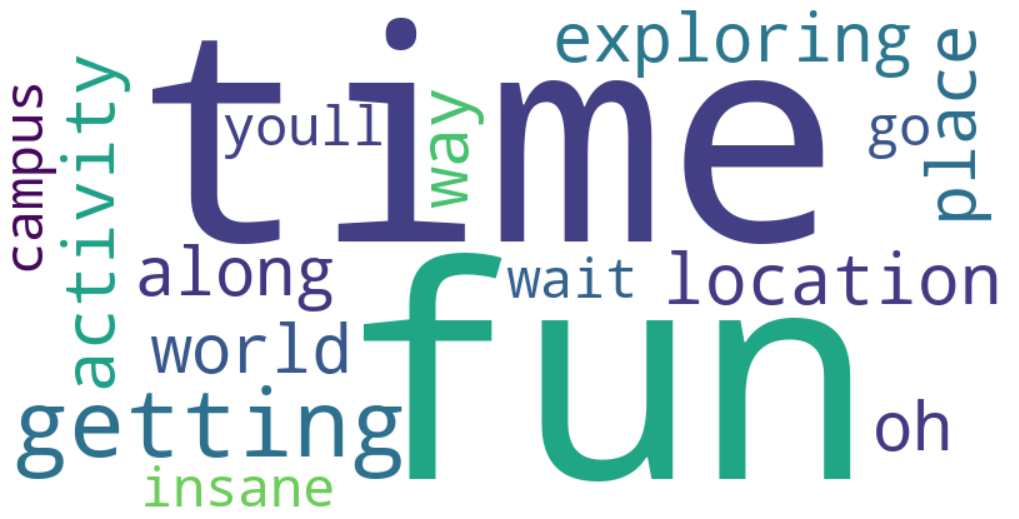

In [32]:
suggestions = text = ' '.join(df['qid5_9_text'].explode().dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Ideal Giveaways

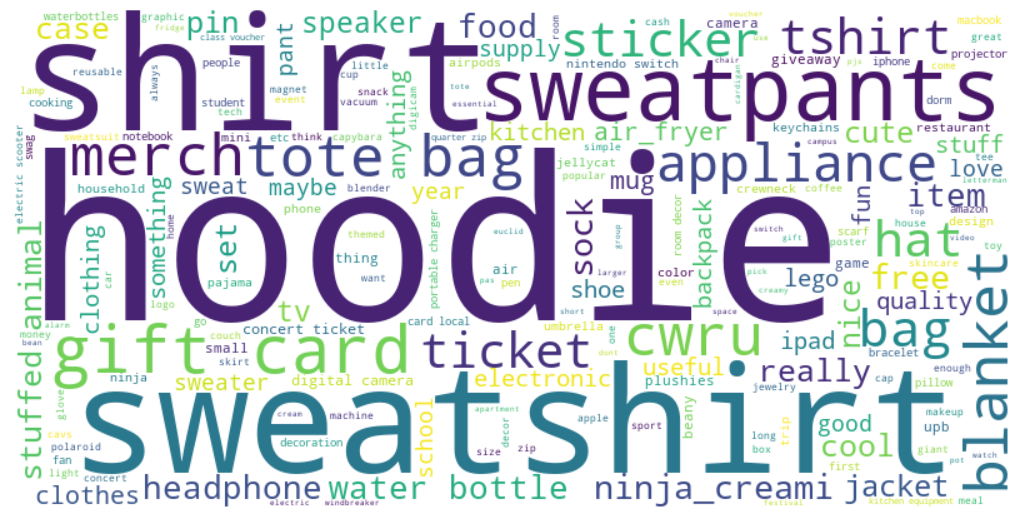

In [33]:
suggestions = text = ' '.join(df['qid38_text'].explode().dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Food Spot Recs

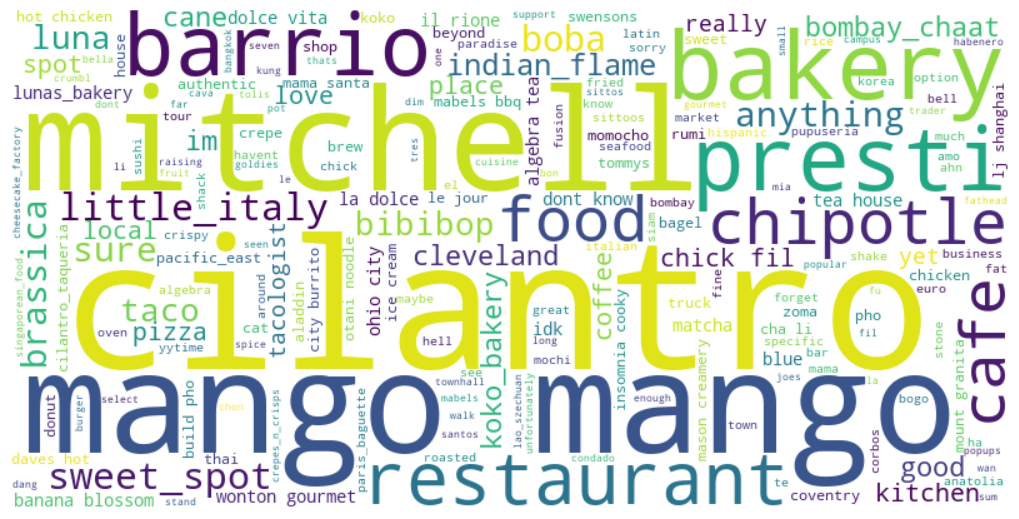

In [34]:
suggestions = text = ' '.join(df['qid53_text'].explode().dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Why people don't attend


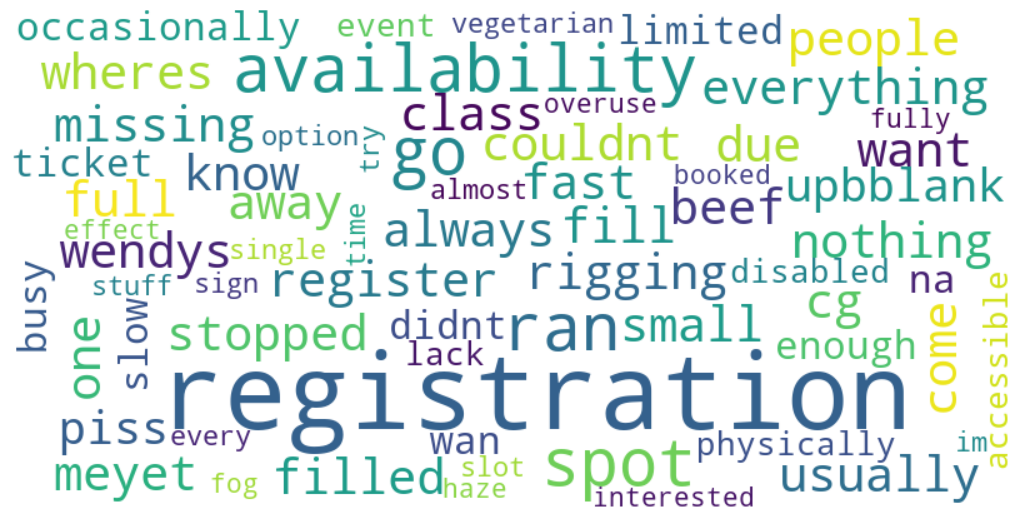

In [35]:
suggestions = text = ' '.join(df['qid7_9_text'].explode().dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Best way to advertise

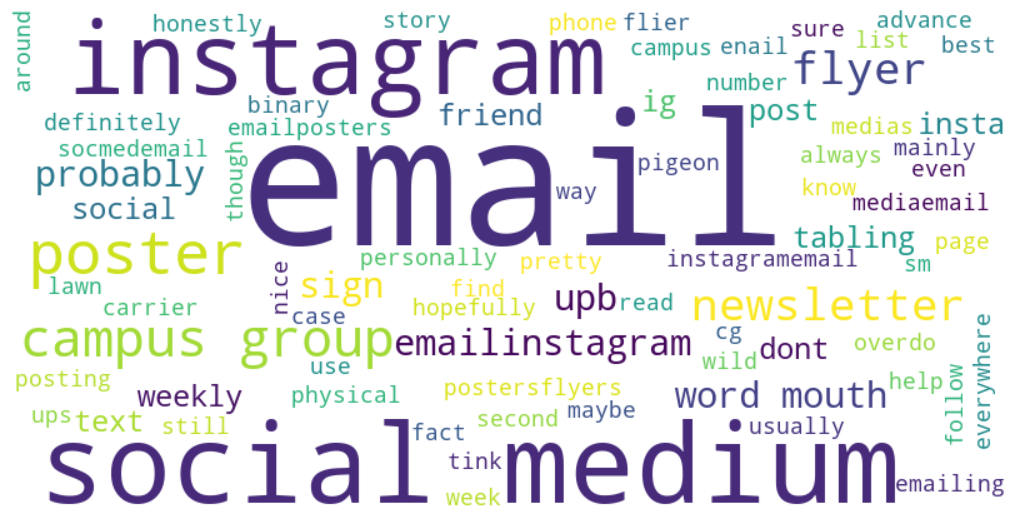

In [36]:
suggestions = text = ' '.join(df['qid22_text'].explode().dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Demographic Data Analysis

## Graduation Classes Attendance


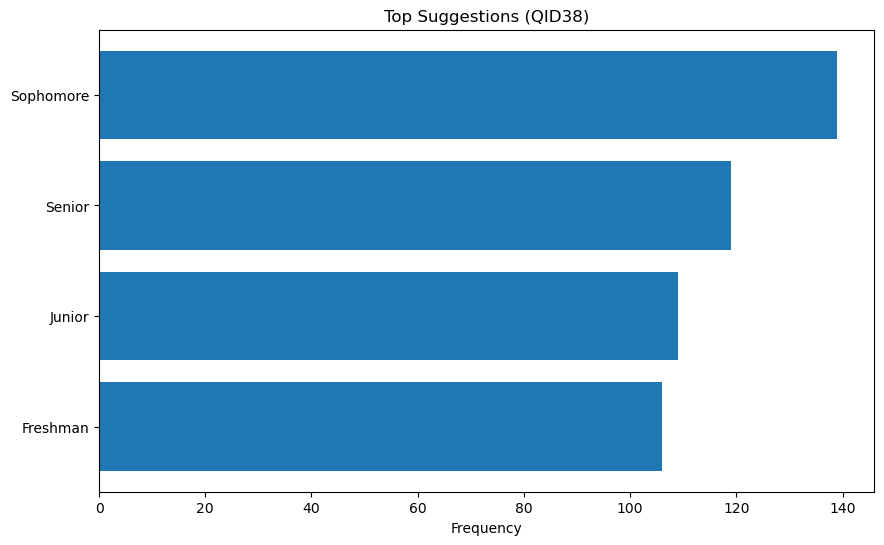

In [37]:
from collections import Counter
import matplotlib.pyplot as plt

# Explode list responses, drop NaNs
words = df['qid39'].explode().dropna()

# Count frequencies
word_counts = Counter(words)

# Convert to DataFrame
freq_df = pd.DataFrame(word_counts.most_common(15), columns=['Word', 'Count'])


# Plot top 15
plt.figure(figsize=(10,6))
plt.barh(freq_df['Word'], freq_df['Count'])
plt.gca().invert_yaxis()  # highest on top
plt.title("Top Suggestions (QID38)")
plt.xlabel("Frequency")
plt.show()


## Majors

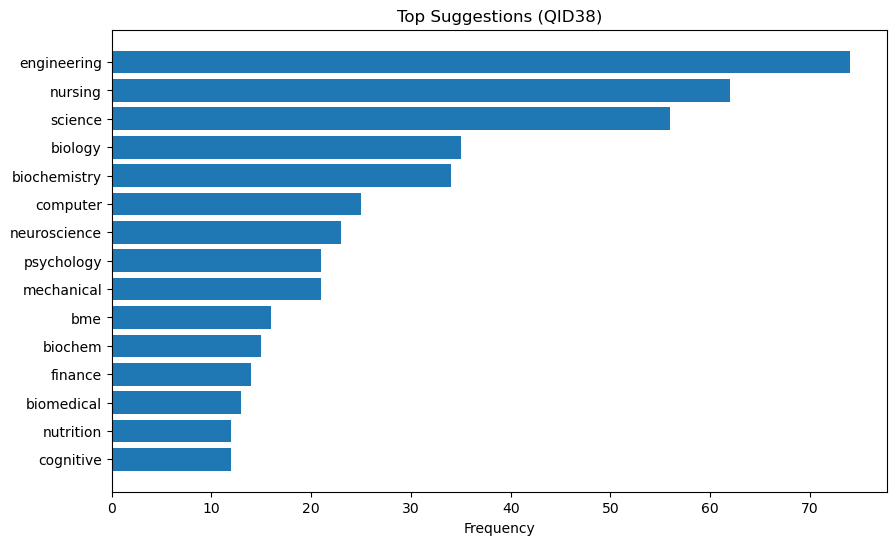

In [38]:
from collections import Counter
import matplotlib.pyplot as plt

# Explode list responses, drop NaNs
words = df['qid40_text'].explode().dropna()

# Count frequencies
word_counts = Counter(words)

# Convert to DataFrame
freq_df = pd.DataFrame(word_counts.most_common(15), columns=['Word', 'Count'])

# Plot top 15
plt.figure(figsize=(10,6))
plt.barh(freq_df['Word'], freq_df['Count'])
plt.gca().invert_yaxis()  # highest on top
plt.title("Top Suggestions (QID38)")
plt.xlabel("Frequency")
plt.show()


## Region

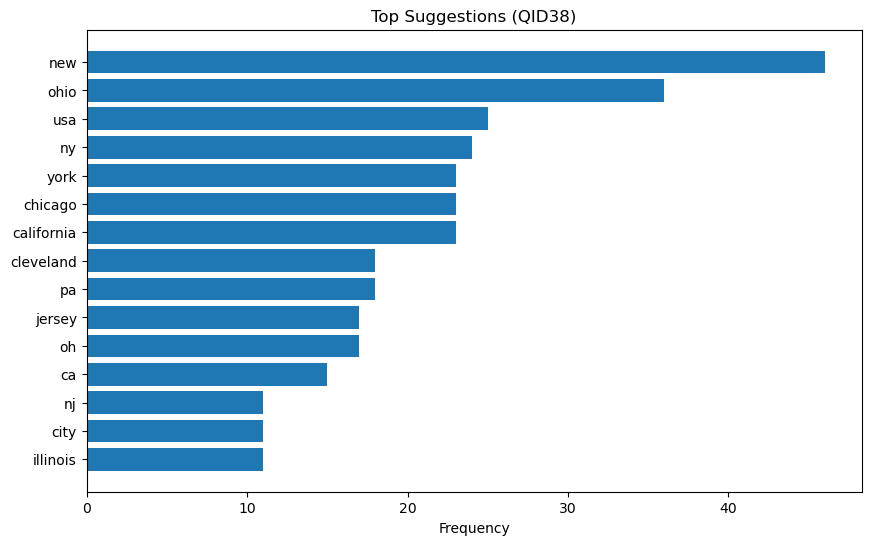

In [39]:
from collections import Counter
import matplotlib.pyplot as plt

# Explode list responses, drop NaNs
words = df['qid41_text'].explode().dropna()

# Count frequencies
word_counts = Counter(words)

# Convert to DataFrame
freq_df = pd.DataFrame(word_counts.most_common(15), columns=['Word', 'Count'])

# Plot top 15
plt.figure(figsize=(10,6))
plt.barh(freq_df['Word'], freq_df['Count'])
plt.gca().invert_yaxis()  # highest on top
plt.title("Top Suggestions (QID38)")
plt.xlabel("Frequency")
plt.show()


## Culture


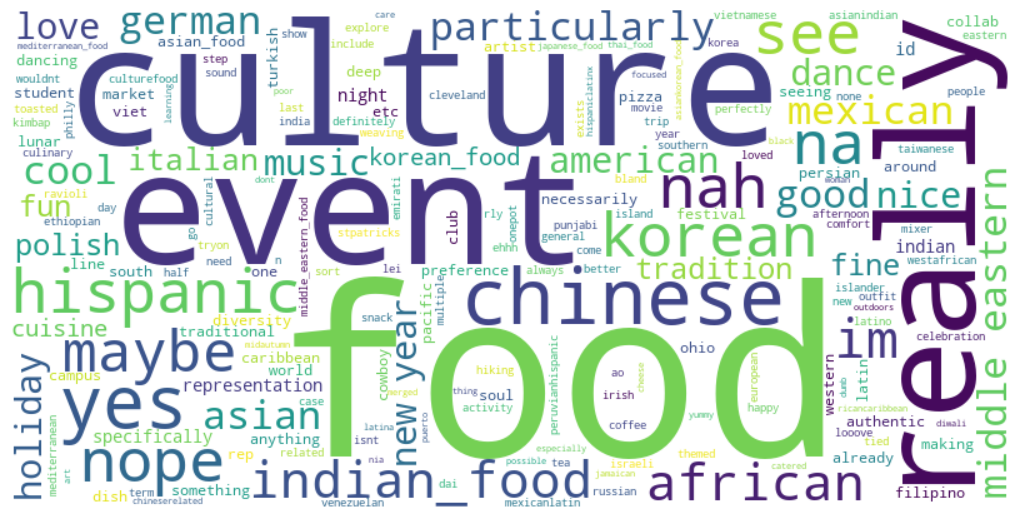

In [40]:
suggestions = text = ' '.join(df['qid42_text'].explode().dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Hobbies/Interests

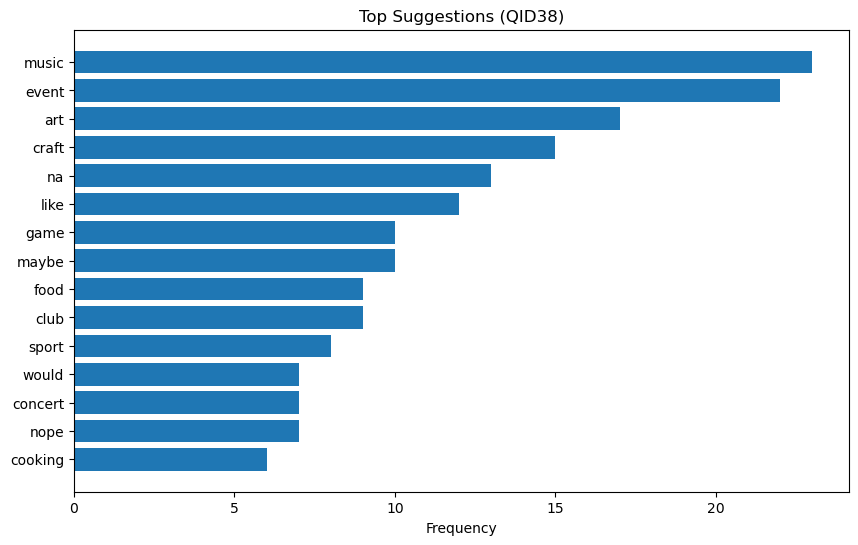

In [41]:
from collections import Counter
import matplotlib.pyplot as plt

# Explode list responses, drop NaNs
words = df['qid54_text'].explode().dropna()

# Count frequencies
word_counts = Counter(words)

# Convert to DataFrame
freq_df = pd.DataFrame(word_counts.most_common(15), columns=['Word', 'Count'])

# Plot top 15
plt.figure(figsize=(10,6))
plt.barh(freq_df['Word'], freq_df['Count'])
plt.gca().invert_yaxis()  # highest on top
plt.title("Top Suggestions (QID38)")
plt.xlabel("Frequency")
plt.show()


## Traditions/Holidays

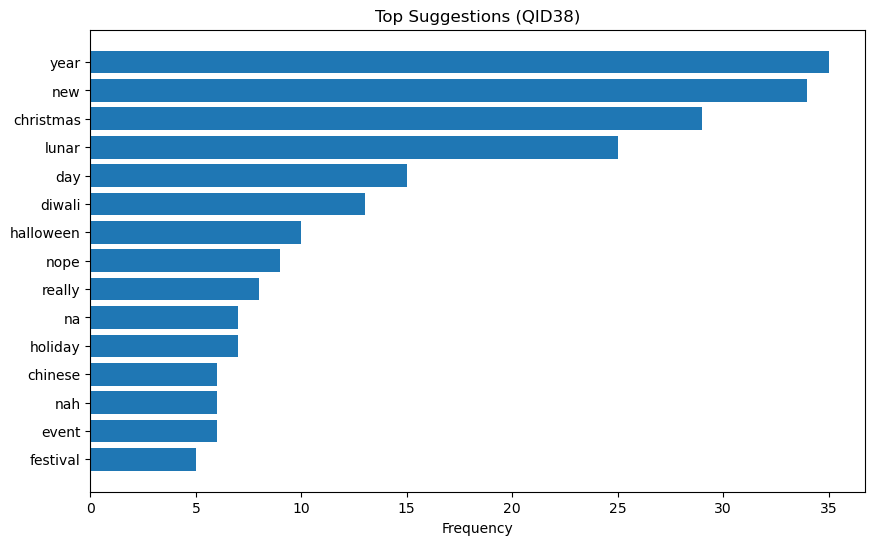

In [42]:
from collections import Counter
import matplotlib.pyplot as plt

# Explode list responses, drop NaNs
words = df['qid55_text'].explode().dropna()

# Count frequencies
word_counts = Counter(words)

# Convert to DataFrame
freq_df = pd.DataFrame(word_counts.most_common(15), columns=['Word', 'Count'])

# Plot top 15
plt.figure(figsize=(10,6))
plt.barh(freq_df['Word'], freq_df['Count'])
plt.gca().invert_yaxis()  # highest on top
plt.title("Top Suggestions (QID38)")
plt.xlabel("Frequency")
plt.show()


## Dietary Restrictions

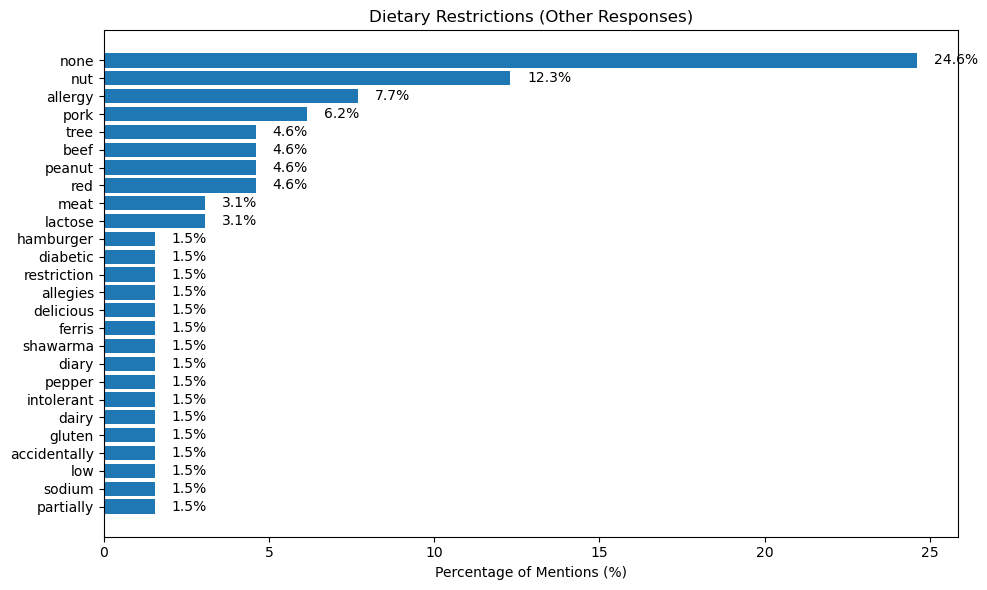

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Example: dietary restrictions column
# df['qid52_3_text'] contains lists like ['vegan'] or NaN

# Explode, drop NA, flatten
diet_words = df['qid52_3_text'].explode().dropna().str.lower()

# Remove common filler words
exclude = {"na", "food", "eat", "naa", "anything", "give", "need", "oops", "chose", "option","free","ftee"}
diet_words = [w for w in diet_words if w not in exclude]

# Count frequencies
counts = Counter(diet_words)
total = sum(counts.values())

# Convert to DataFrame with percentages
diet_df = pd.DataFrame(counts.most_common(), columns=['Restriction', 'Count'])
diet_df['Percent'] = 100 * diet_df['Count'] / total

# Plot
plt.figure(figsize=(10,6))
bars = plt.barh(diet_df['Restriction'], diet_df['Percent'])

plt.xlabel("Percentage of Mentions (%)")
plt.title("Dietary Restrictions (Other Responses)")

# Add % labels
for bar, pct in zip(bars, diet_df['Percent']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{pct:.1f}%", va='center')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Accessibility Needs

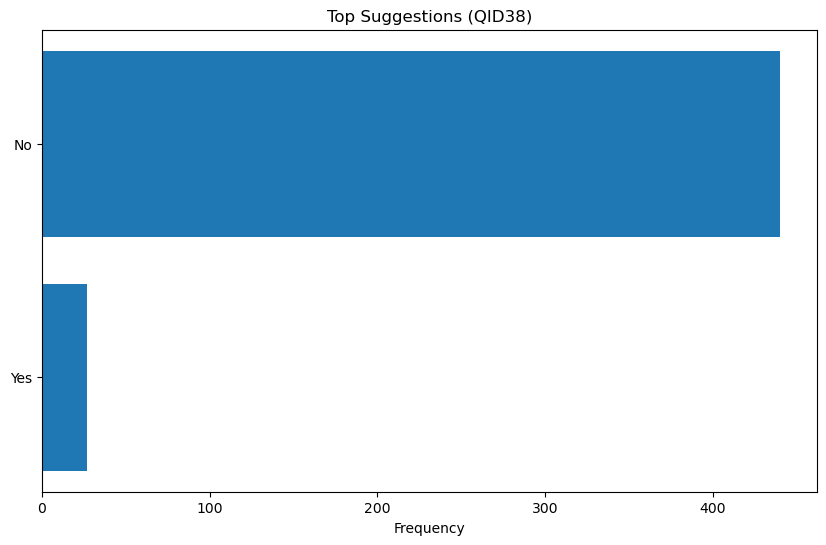

In [44]:
from collections import Counter
import matplotlib.pyplot as plt

# Explode list responses, drop NaNs
words = df['qid26'].explode().dropna()

# Count frequencies
word_counts = Counter(words)

# Convert to DataFrame
freq_df = pd.DataFrame(word_counts.most_common(15), columns=['Word', 'Count'])


# Plot top 15
plt.figure(figsize=(10,6))
plt.barh(freq_df['Word'], freq_df['Count'])
plt.gca().invert_yaxis()  # highest on top
plt.title("Top Suggestions (QID38)")
plt.xlabel("Frequency")
plt.show()


## Inclusitivity

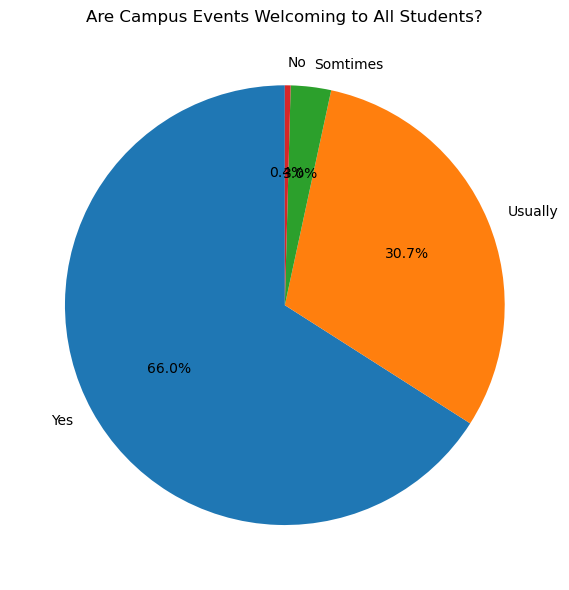

In [45]:
plot_yes_no(df, "qid23", title="Are Campus Events Welcoming to All Students?")


# Attendance Analytics

Other stuff

Attendance vs preferences
Food vs event features